In [56]:
# important libraries import

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings('ignore')


In [57]:
# Read the Excel file

data = pd.read_excel('Sample_Superstore(1) (Autosaved).xlsx')

# Display the first 5 rows

print(data.head(5))

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20847           High      0.01        2.84           0.93            3   
1   20228  Not Specified      0.02      500.98          26.00            5   
2   21776       Critical      0.06        9.48           7.29           11   
3   24844         Medium      0.09       78.69          19.99           14   
4   24846         Medium      0.08        3.28           2.31           14   

       Customer Name       Ship Mode Customer Segment Product Category  ...  \
0      Bonnie Potter     Express Air        Corporate  Office Supplies  ...   
1     Ronnie Proctor  Delivery Truck      Home Office        Furniture  ...   
2      Marcus Dunlap     Regular Air      Home Office        Furniture  ...   
3  Gwendolyn F Tyson     Regular Air   Small Business        Furniture  ...   
4  Gwendolyn F Tyson     Regular Air   Small Business  Office Supplies  ...   

    Region State or Province         City  Postal Code O

In [58]:
# Display the count of missing values in each column

print("Missing values before handling:")
print(data.isnull().sum())

Missing values before handling:
Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64


In [59]:
# Fill missing values in 'Product Base Margin' column with its mean

data["Product Base Margin"].fillna(data["Product Base Margin"].mean(), inplace=True)


# Verify missing values after filling

print("\nMissing values after handling 'Product Base Margin':")
print(data.isnull().sum())


Missing values after handling 'Product Base Margin':
Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64


In [60]:
# Display the concise summary of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

In [61]:
# Display descriptive statistics for numeric columns

data.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952,1952,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.515186,51534.769467,2015-03-29 01:21:08.852459008,2015-03-30 23:55:34.426229248,114.793859,12.944672,985.828832,82365.924180
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,2015-01-01 00:00:00,2015-01-02 00:00:00,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,2015-02-11 00:00:00,2015-02-13 00:00:00,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.520000,48765.500000,2015-03-27 12:00:00,2015-03-29 00:00:00,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,2015-05-15 00:00:00,2015-05-16 00:00:00,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2015-06-30 00:00:00,2015-07-08 00:00:00,9228.225600,167.000000,45737.330000,91586.000000
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.136492,29362.828420,NaN,NaN,1141.112387,13.871565,2559.900167,19042.295798


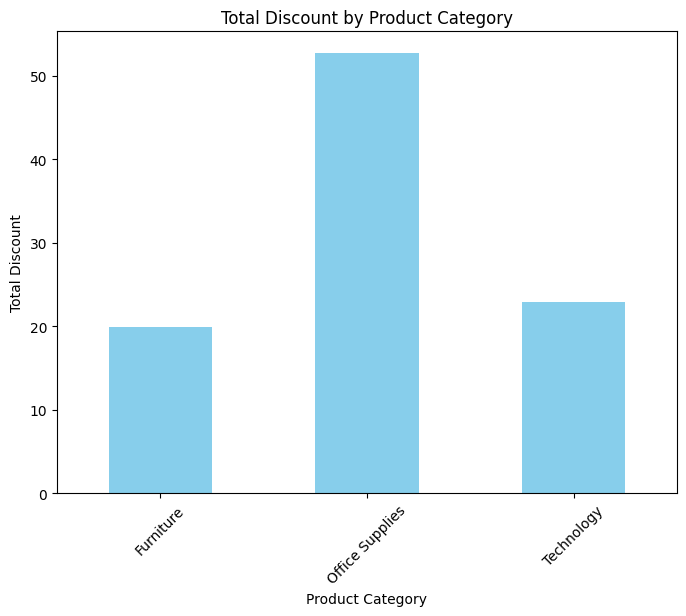

In [62]:
# Group data by 'Product Category' and calculate the total discount

category_discounts = data.groupby('Product Category')["Discount"].sum()

# Plot the data as a bar plot

category_discounts.plot(kind='bar', color='skyblue', figsize=(8, 6))

# Add labels and a title

plt.title('Total Discount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Discount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

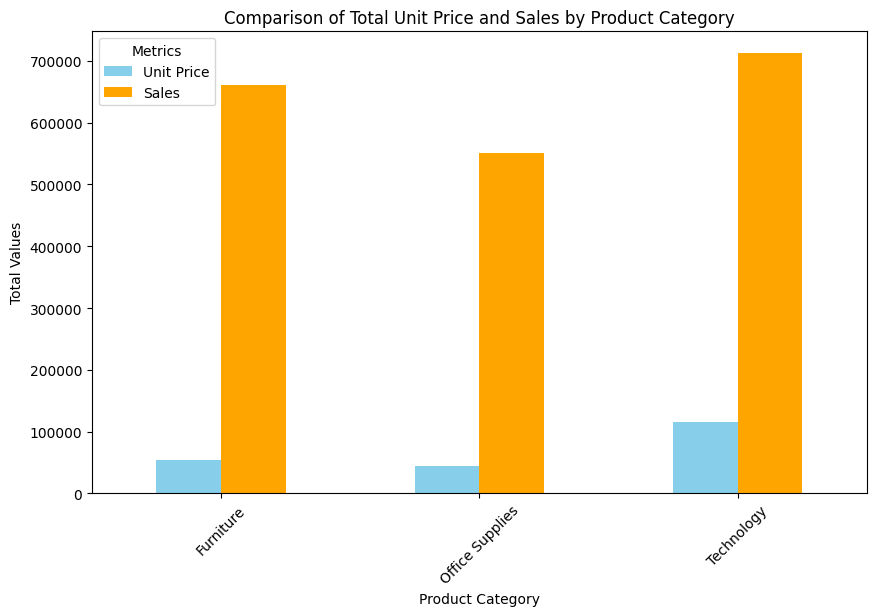

In [63]:
# Group by 'Product Category' and calculate the total for 'Unit Price' and 'Sales'

category_summary = data.groupby("Product Category")[["Unit Price", "Sales"]].sum()

# Plot a grouped bar chart

category_summary.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Add labels and title

plt.title('Comparison of Total Unit Price and Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Values')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend(title="Metrics")

plt.show()


Product Category
Furniture          660704.31
Office Supplies    551368.62
Technology         712264.95
Name: Sales, dtype: float64


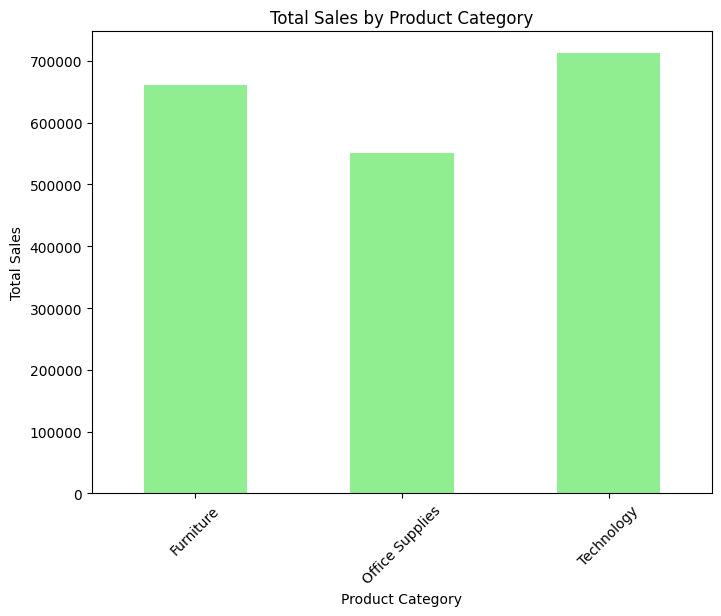

In [64]:
# Group by 'Product Category' and sum up 'Sales'
category_sales = data.groupby("Product Category")["Sales"].sum()

# Print the result
print(category_sales)

# Plotting the total sales by product category
category_sales.plot(kind='bar', color='lightgreen', figsize=(8, 6))

# Add title and labels
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()


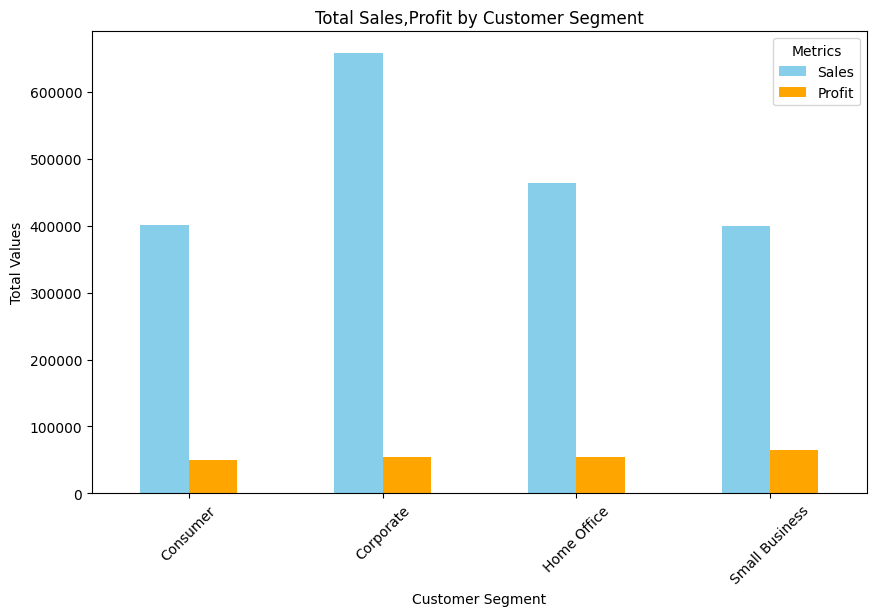

In [65]:
# Grouping by 'Customer Segment' and summarizing
segment_summary = data.groupby("Customer Segment")[["Sales","Profit"]].sum()

# Plotting a grouped bar chart
segment_summary.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Adding labels and title
plt.title('Total Sales,Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Values')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title='Metrics')
plt.show()


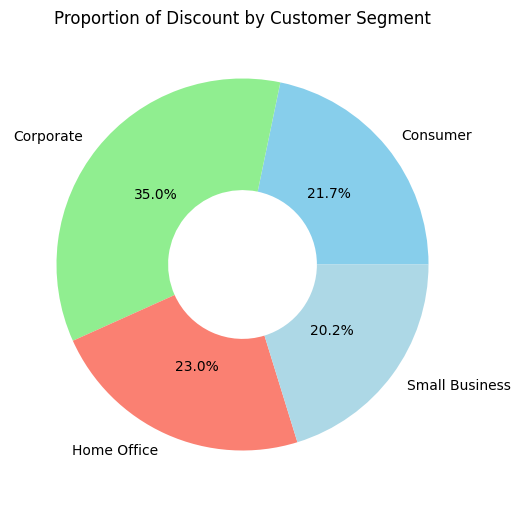

In [66]:
# Grouping by 'Customer Segment' and summing 'Discount'
segment_discount = data.groupby("Customer Segment")["Discount"].sum()

# Plotting a donut chart
plt.figure(figsize=(6, 8))
colors = ['skyblue', 'lightgreen', 'salmon', 'lightblue']
segment_discount.plot(kind='pie', autopct='%1.1f%%', colors=colors, wedgeprops={'width': 0.6}) # Creates the donut effect


# Adding title
plt.title('Proportion of Discount by Customer Segment')
plt.ylabel('')  # Remove default ylabel for a cleaner look
plt.show()



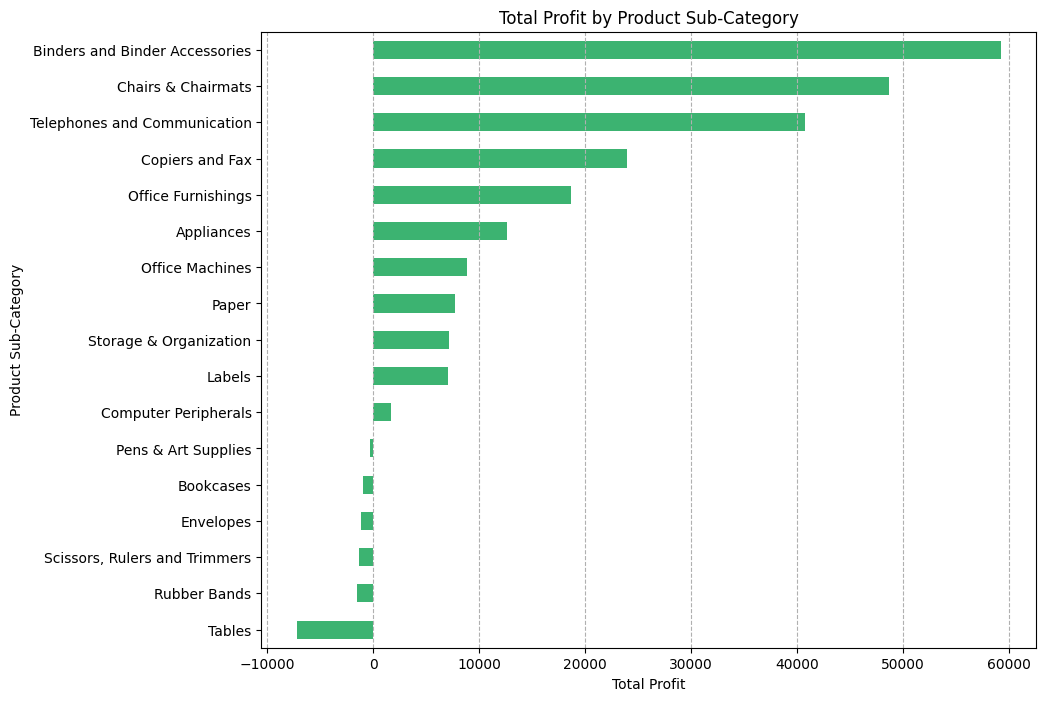

In [67]:
# Grouping by 'Product Sub-Category' and calculating the total profit
sub_category_profit = data.groupby("Product Sub-Category")["Profit"].sum()

# Sorting the profits for better visualization
sub_category_profit = sub_category_profit.sort_values(ascending=True)

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 8))
sub_category_profit.plot(kind='barh', color='mediumseagreen')

# Adding labels and title
plt.title('Total Profit by Product Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Product Sub-Category')
plt.grid(axis='x', linestyle='--')
plt.show()


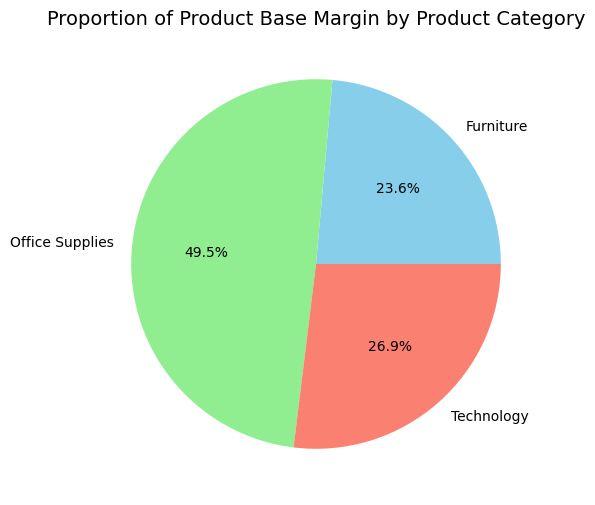

In [68]:
# Grouping by 'Product Category' and summing 'Product Base Margin'
category_base_margin = data.groupby("Product Category")["Product Base Margin"].sum()

# Plotting a pie chart
plt.figure(figsize=(7, 6))
category_base_margin.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])

# Adding title
plt.title('Proportion of Product Base Margin by Product Category', fontsize=14)
plt.ylabel('')  # Hides the y-axis label
plt.show()

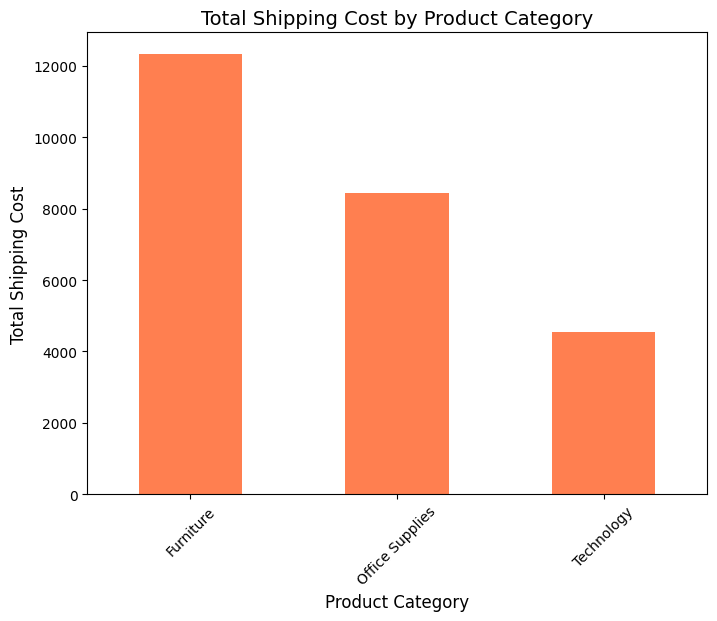

In [69]:
# Grouping by 'Product Category' and summing 'Shipping Cost'
category_shipping_cost = data.groupby("Product Category")['Shipping Cost'].sum()

# Plotting the data as a bar chart
plt.figure(figsize=(8, 6))
category_shipping_cost.plot(kind='bar', color='coral')

# Adding title and labels
plt.title('Total Shipping Cost by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Shipping Cost', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [70]:
# Grouping data by 'Product Category' and summing 'Profit'

data.groupby("Product Category")["Profit"].sum()

Product Category
Furniture          59249.445936
Office Supplies    89525.009537
Technology         75303.156364
Name: Profit, dtype: float64

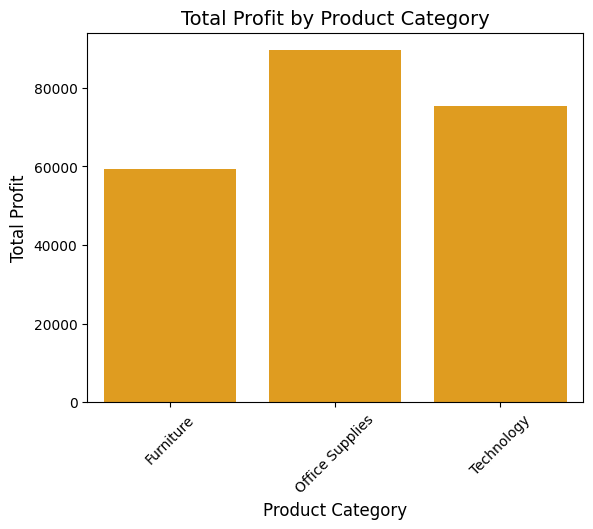

In [71]:
# Grouping data by 'Product Category' and summing 'Profit'
profit_by_category = data.groupby('Product Category')['Profit'].sum().reset_index()

# Plotting the barplot
sns.barplot(x='Product Category', y='Profit', data=profit_by_category, color='orange')

# Adding title and labels
plt.title('Total Profit by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.show()
